# Introduction

This notebook presents the pre-processing of the poloniex (crypto-currencies) data used to produce the input tensors of the neural network. <br>
For each stock, the input is a raw time series of the prices (High, Low, Open, Close). <i>Please note for crypto-currencies, the market never closes, so Close(t) = Open(t+1). </i><br>
The output is a matrix of 3 rows and n (number of available data points) columns. <br>
The columns correspond to:
- High(t-1)/Open(t-1)
- Low(t-1)/Open(t-1)
- Open(t)/Open(t-1)
    
<u>Remark:</u> We don't need to normalize the data since it's already of ratio of 2 prices closed to one. 

# Imports

In [1]:
#for navigation in the folders
import os
import pathlib

from time import strptime
from datetime import datetime

from tqdm import tqdm

#for plot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns 
import PIL
import pickle
from time import strftime



import seaborn as sns
sns.despine()


<Figure size 432x288 with 0 Axes>

# Processing

In [2]:
data_dir = '/poloniex_data/'
directory = os.getcwd() + data_dir # path to the files
files_tags = os.listdir(directory) #these are the differents pdf files

#this is here because hidden files are also shown in the list. 
for file in files_tags:
    if file[0] == '.':
        files_tags.remove(file)
stock_name = [file.split('.')[0] for file in files_tags]
stocks = [file for file in files_tags]
print(len(stock_name) == len(stocks))
print('There are {} different currencies.'.format(len(stock_name)))

True
There are 15 different currencies.


In [3]:
stocks

['BTCUSDT.csv',
 'DASHBTC.csv',
 'DOGEBTC.csv',
 'ETCBTC.csv',
 'ETCETH.csv',
 'ETHBTC.csv',
 'ETHUSDT.csv',
 'f',
 'GNTBTC.csv',
 'GNTETH.csv',
 'LTCBTC.csv',
 'REPBTC.csv',
 'REPETH.csv',
 'XMRBTC.csv',
 'XRPBTC.csv']

In [4]:
close_price = pd.DataFrame()
kept_stocks = list()
len_stocks = list()

for s in stocks:
    if(s is not 'f'):
        df = pd.read_csv('.'+data_dir+s , index_col='date')
        close_price[s[:-4]]=df.close
        kept_stocks.append(s)
        len_stocks.append(len(df))
        print(s[:-4], len(df))

BTCUSDT 42010
DASHBTC 60103
DOGEBTC 60915
ETCBTC 17032
ETCETH 17031
ETHBTC 33878
ETHUSDT 33876
GNTBTC 7001
GNTETH 7001
LTCBTC 61096
REPBTC 13547
REPETH 13547
XMRBTC 55285
XRPBTC 51113


We want roughly 1 year of data. So, we drop the data with less than 17000 rows.

In [5]:
min_len = np.min(len_stocks)
min_len

7001

In [6]:
list_open = list()
list_close = list()
list_high = list()
list_low = list()

for s in tqdm(kept_stocks):
    data = pd.read_csv(os.getcwd() + data_dir + s).fillna('bfill').copy()
    data = data[['open', 'close', 'high', 'low']]
    data = data.tail(min_len)
    list_open.append(data.open.values)
    list_close.append(data.close.values)
    list_high.append(data.high.values)
    list_low.append(data.low.values)

array_open = np.transpose(np.array(list_open))[:-1]
array_open_of_the_day = np.transpose(np.array(list_open))[1:]
array_close = np.transpose(np.array(list_close))[:-1]
array_high = np.transpose(np.array(list_high))[:-1]
array_low = np.transpose(np.array(list_low))[:-1]

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 30.07it/s]


In [7]:
np.transpose(np.array(list_low)).shape

(7001, 14)

In [8]:
X = np.transpose(np.array([
    array_high/array_open,
    array_low/array_open,
    array_open_of_the_day/array_open]), axes=(0, 2, 1))
X.shape

(3, 14, 7000)

The shape corresponds to:
- 3: Number of features
- 10: Number of stocks
- 17030: Number of data points

# Save

In [9]:
np.save('./np_data/inputCrypto.npy', X)

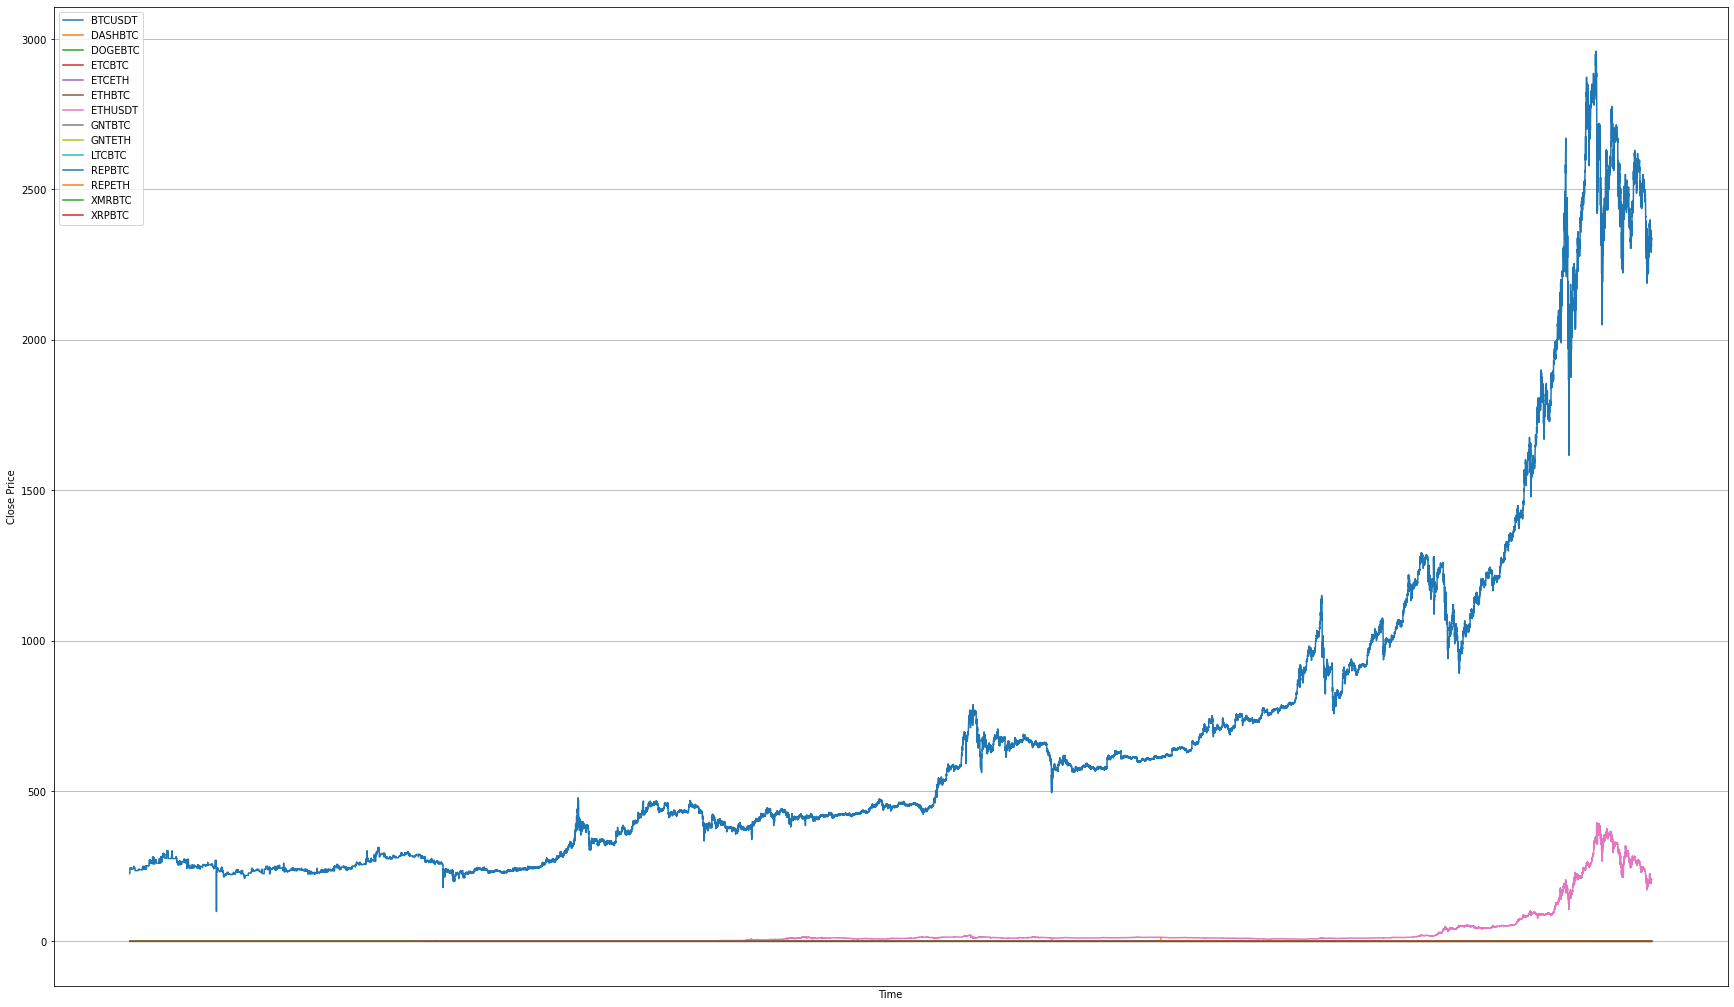

In [10]:
close_price = close_price.fillna(method='ffill')
close_price.index =close_price.index.astype('datetime64[ns]')
# close_price=close_price.dropna(inplace = False)
%matplotlib inline
_ = pd.concat([close_price],axis=1).plot(figsize=(30,20),grid=True, xlabel='Time', ylabel='Close Price')
plt.savefig('./cryptofig/allcrypto.png')

```
▪The End
```